In [171]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.model_selection import cross_val_score

sns.set(style='whitegrid')

In [172]:
glass = pd.read_csv('../NBayes/data/glass.data')
glass.drop('id', axis=1, inplace=True)
glass.head(2)

ri     na    mg    al     si     k    ca   ba   fe  class
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0      1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0      1

In [173]:
diabetes = pd.read_csv('../NBayes/data/pima-indians-diabetes.csv', skiprows=9)
diabetes.head(2)

times_pregnant  plasma  blood_pressure  skin_thickness  insulin  mass_idx  \
0               6     148              72              35        0      33.6   
1               1      85              66              29        0      26.6   

   pedigree  age  class  
0     0.627   50      1  
1     0.351   31      0

In [174]:
wine_data = datasets.load_wine()
wine = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
wine['class'] = wine_data.target
display(wine.head(2))

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   

   od280/od315_of_diluted_wines  proline  class  
0                          3.92   1065.0      0  
1                          3.40   1050.0      0

In [175]:
cancer_data = datasets.load_breast_cancer()
cancer = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
cancer['class'] = cancer_data.target
cancer.head(2)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   

   mean fractal dimension  ...    worst texture  worst perimeter  worst area  \
0                 0.07871  ...            17.33            184.6      2019.0   
1                 0.05667  ...            23.41            158.8      1956.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   

   worst symmetry  worst fractal dimension  class  
0          0.4601                  0.11890      0  
1          0.2750                  0.08902      0  

[2 rows x 31 columns]

In [176]:
def get_random_weights(arr):
    return np.random.random(arr.shape)

get_random_weights(np.arange(5))

array([ 0.5753639 ,  0.15643119,  0.88977635,  0.013548  ,  0.70445516])

In [177]:
def plot_heights_over_bars(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()  + p.get_width() / 2.,
                height + .01,
                '{:1.2f}'.format(height),
                ha='center',
                fontsize=10) 

In [178]:
datasets = [('glass', glass), ('diabetes', diabetes), ('wine', wine), ('cancer', cancer)]
votings = ['uniform', 'distance', get_random_weights]

v_results = {
    'scorings': [],
    'voting_types': [],
    'dataset_names': []
}

for voting in votings:
    clf = KNeighborsClassifier(weights=voting)

    for name, ds in datasets:
        scores = cross_val_score(clf, ds.drop('class', axis=1), ds['class'], scoring='f1_micro', cv=5)
        
        if type(voting).__name__ == 'function':
            voting = voting.__name__
        
        v_results['voting_types'].append(voting)
        v_results['scorings'].append(np.mean(scores))
        v_results['dataset_names'].append(name)
        
v_df = pd.DataFrame.from_dict(v_results)
v_df


dataset_names  scorings        voting_types
0          glass  0.610139             uniform
1       diabetes  0.723979             uniform
2           wine  0.686021             uniform
3         cancer  0.928049             uniform
4          glass  0.628220            distance
5       diabetes  0.726602            distance
6           wine  0.714321            distance
7         cancer  0.929788            distance
8          glass  0.618537  get_random_weights
9       diabetes  0.699262  get_random_weights
10          wine  0.659348  get_random_weights
11        cancer  0.919230  get_random_weights

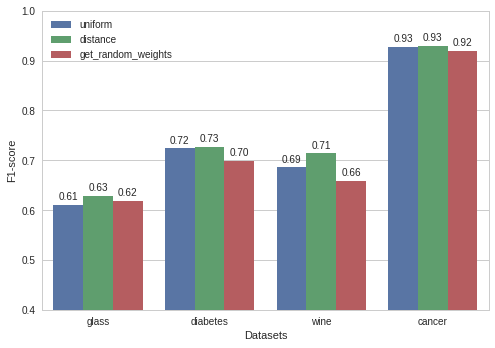

In [179]:
ax = sns.barplot('dataset_names', 'scorings', hue='voting_types', data=v_results)
plot_heights_over_bars(ax)

_ = ax.set_ylim(.4, 1)
ax.set_ylabel('F1-score')
ax.set_xlabel('Datasets')

plt.savefig('images/votings.pdf', format='pdf')


dataset_names    metrics  scorings
0         glass  euclidean  0.610139
1      diabetes  euclidean  0.723979
2          wine  euclidean  0.686021
3        cancer  euclidean  0.928049
4         glass  manhattan  0.637421

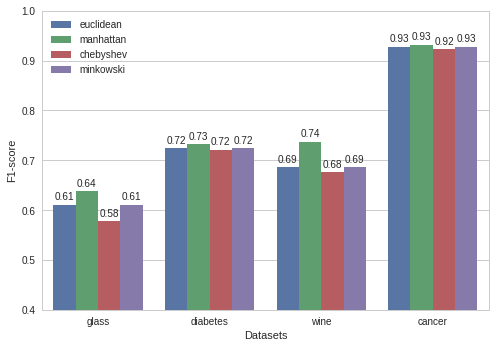

In [180]:
metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']

results = {
    'scorings': [],
    'metrics': [],
    'dataset_names': []
}

for metric in metrics:
    clf = KNeighborsClassifier(metric=metric)

    for name, ds in datasets:
        scores = cross_val_score(clf, ds.drop('class', axis=1), ds['class'], scoring='f1_micro', cv=5)
        
        results['metrics'].append(metric)
        results['scorings'].append(np.mean(scores))
        results['dataset_names'].append(name)
        
display(pd.DataFrame.from_dict(results).head())

ax = sns.barplot('dataset_names', 'scorings', hue='metrics', data=results)
plot_heights_over_bars(ax)
_ = ax.set_ylim(.4, 1)

ax.set_ylabel('F1-score')
ax.set_xlabel('Datasets')

ax.legend(loc='upper left')

plt.savefig('images/distances.pdf', format='pdf')

dataset_names  ks  scorings
0         glass   2  0.613145
1      diabetes   2  0.694050
2          wine   2  0.664727
3        cancer   2  0.905102
4         glass   3  0.605060

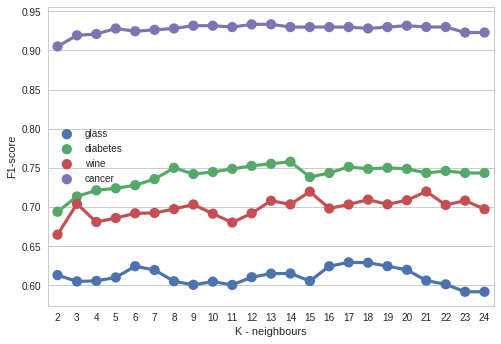

In [181]:
ks = range(2, 25)

results = {
    'scorings': [],
    'ks': [],
    'dataset_names': []
}

for k in ks:
    clf = KNeighborsClassifier(n_neighbors=k)

    for name, ds in datasets:
        scores = cross_val_score(clf, ds.drop('class', axis=1), ds['class'], scoring='f1_micro', cv=5)
        
        results['ks'].append(k)
        results['scorings'].append(np.mean(scores))
        results['dataset_names'].append(name)
        
display(pd.DataFrame.from_dict(results).head())

ax = sns.pointplot('ks', 'scorings', hue='dataset_names', data=results)
ax.set_xlabel('K - neighbours')
ax.set_ylabel('F1-score')

plt.savefig('images/k_neighbours.pdf', format='pdf')

cv_sizes dataset_names    scores
0         2         glass  0.560245
1         3         glass  0.594646
2         4         glass  0.618548
3         5         glass  0.610139
4         6         glass  0.623715

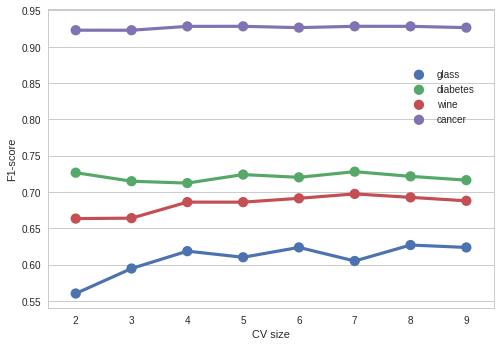

In [182]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

cv_sizes = range(2, 10)

cv_results = {
    'scores': [],
    'dataset_names': [],
    'cv_sizes': []
}

clf = KNeighborsClassifier()

for name, ds in datasets:
    for n_splits in cv_sizes:
        skf = StratifiedKFold(n_splits=n_splits)

        X = ds.drop('class', axis=1)
        y = ds['class']

        fscores = []

        for train_index, test_index in skf.split(X, y):
            X_train, X_test = X.loc[train_index], X.loc[test_index]
            y_train, y_test = y.loc[train_index], y.loc[test_index]

            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)

            fscores.append(f1_score(y_test, y_pred, average='micro'))

        cv_results['scores'].append(np.mean(fscores))
        cv_results['dataset_names'].append(name)
        cv_results['cv_sizes'].append(n_splits)

display(pd.DataFrame.from_dict(cv_results).head())

ax = sns.pointplot('cv_sizes', 'scores', hue='dataset_names', data=cv_results)
ax.set_xlabel('CV size')
ax.set_ylabel('F1-score')

ax.legend(loc=(.8, .6))

plt.savefig('images/cv_size.pdf', format='pdf')

classifiers dataset_names  scorings
0               GaussianNB         glass  0.331196
1               GaussianNB      diabetes  0.751337
2               GaussianNB          wine  0.955839
3               GaussianNB        cancer  0.940377
4            MultinomialNB         glass  0.451218
5            MultinomialNB      diabetes  0.593702
6            MultinomialNB          wine  0.845620
7            MultinomialNB        cancer  0.896376
8   DecisionTreeClassifier         glass  0.588429
9   DecisionTreeClassifier      diabetes  0.713666
10  DecisionTreeClassifier          wine  0.882424
11  DecisionTreeClassifier        cancer  0.920877
12    KNeighborsClassifier         glass  0.610139
13    KNeighborsClassifier      diabetes  0.723979
14    KNeighborsClassifier          wine  0.686021
15    KNeighborsClassifier        cancer  0.928049

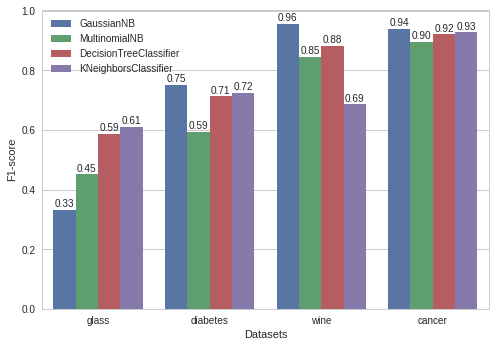

In [183]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB


classifiers = [GaussianNB(), MultinomialNB(), DecisionTreeClassifier(), KNeighborsClassifier()]

results = {
    'scorings': [],
    'classifiers': [],
    'dataset_names': []
}

for clf in classifiers:
    for name, ds in datasets:
        scores = cross_val_score(clf, ds.drop('class', axis=1), ds['class'], scoring='f1_micro', cv=5)
        
        results['classifiers'].append(clf.__class__.__name__)
        results['scorings'].append(np.mean(scores))
        results['dataset_names'].append(name)
        
display(pd.DataFrame.from_dict(results))

ax = sns.barplot('dataset_names', 'scorings', hue='classifiers', data=results)
ax.set_xlabel('Datasets')
ax.set_ylabel('F1-score')

plot_heights_over_bars(ax)

plt.savefig('images/comparison.pdf', format='pdf')